# Mise en commun des travaux de data cleaning

Cette partie contient les travaux des différents membres du groupe pour le data-cleaning <br>
Cette partie à pour but de rendre les données plus facilement exploitable pour la suite

<b>idées:</b>
 - Ajouter column jour de la semaine pour connaître le jour de la semaine en enlevant l'heure.
 - Ajouter le jour du mois.... ( voir la plage de date des envoies de mail).
 - Ajouter column horaire pour connaître l'horaire indépendamment du jour.
 - Ajouter la longueur du contenu.
 - Regarder qui sont ceux qui ont envoyé le plus de mail.
 - Regarder qui sont ceux qui on reçu le plus de mail.
 - regarder la longueur des contenus. (indépendamment de toute column, en fonction des users, dates, horaires, (et categorie?)).

## Sommaire


# I - Création et nettoyage de divers attributs

Dans cette partie on nettoiera:
 - les attributs de catégories
 - l'attribut "from"
 - l'attribut "to"
 - les valeurs nulles du dataset
On créera aussi les variables suivantes:
 - Longueur du contenu en nombre de caractères
 - Longueur du contenu en nombre de mots
 - Un label de type de longueur du mail
 - Un label de type de longueur du mail en fonction
 
 


In [2]:
data = pd.read_csv('/Users/ayoubmoujane/Desktop/IG4_S7/Projet_datascience/mail.csv',dtype={'To':'string', 'Subject':'string', 'X-From':'string',
       'X-To':'string', 'X-cc':'string', 'X-bcc':'string', 'X-Folder':'string', 'X-Origin':'string', 'X-FileName':'string',
       'content':'string', 'user':'string', 'Cat_1_level_1':'string', 'Cat_1_level_2':'string', 'Cat_1_weight':'string',
       'Cat_2_level_1':'string', 'Cat_2_level_2':'string', 'Cat_2_weight':'string', 'Cat_3_level_1':'string',
       'Cat_3_level_2':'string', 'Cat_3_weight':'string', 'Cat_4_level_1':'string', 'Cat_4_level_2':'string',
       'Cat_4_weight':'string', 'Cat_5_level_1':'string', 'Cat_5_level_2':'string', 'Cat_5_weight':'string',
       'Cat_6_level_1':'string', 'Cat_6_level_2':'string', 'Cat_6_weight':'string', 'Cat_7_level_1':'string',
       'Cat_7_level_2':'string', 'Cat_7_weight':'string', 'Cat_8_level_1':'string', 'Cat_8_level_2':'string',
       'Cat_8_weight':'string', 'Cat_9_level_1':'string', 'Cat_9_level_2':'string', 'Cat_9_weight':'string',
       'Cat_10_level_1':'string', 'Cat_10_level_2':'string', 'Cat_10_weight':'string', 'Cat_11_level_1':'string',
       'Cat_11_level_2':'string', 'Cat_11_weight':'string', 'Cat_12_level_1':'string', 'Cat_12_level_2':'string',
       'Cat_12_weight':'string'})

<br>
<b>On cherche le nombre de valeur nulles</b>

In [3]:
data.isnull().sum()

Unnamed: 0             0
Message-ID             0
Date                   0
From                   0
To                  5001
Subject             5364
X-From                 6
X-To                2600
X-cc               78253
X-bcc              99966
X-Folder               6
X-Origin               6
X-FileName           729
content              402
user                   0
Cat_1_level_1      99790
Cat_1_level_2      99790
Cat_1_weight       99790
Cat_2_level_1      99800
Cat_2_level_2      99800
Cat_2_weight       99800
Cat_3_level_1      99834
Cat_3_level_2      99834
Cat_3_weight       99834
Cat_4_level_1      99896
Cat_4_level_2      99896
Cat_4_weight       99896
Cat_5_level_1      99943
Cat_5_level_2      99943
Cat_5_weight       99943
Cat_6_level_1      99979
Cat_6_level_2      99979
Cat_6_weight       99979
Cat_7_level_1      99990
Cat_7_level_2      99990
Cat_7_weight       99990
Cat_8_level_1      99998
Cat_8_level_2      99998
Cat_8_weight       99998
Cat_9_level_1      99999


<b> Il y a beaucoup de valeurs manquantes:</b>
   - Cat_12_weight, Cat_12_level_2, Cat_11_weight, Cat_11_level_2, Cat_11_level_1 ont toutes les valeurs nulles : on peut donc les enlever.


In [4]:
data = data.drop(['Cat_12_weight','Cat_12_level_1', 'Cat_12_level_2', 'Cat_11_weight', 'Cat_11_level_2', 'Cat_11_level_1'], axis=1)

<br>
<b>On va regarder les valeurs différentes possibles en fonction des variables.</b>

In [5]:
def look_values(df, column):
    return('Unique value of {}: {}'.format(column, len(df[column].unique())))
    

In [6]:
columns = ['Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
        'user', 'Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight',
       'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1',
       'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2',
       'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight',
       'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1',
       'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2',
       'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight',
       'Cat_10_level_1', 'Cat_10_level_2', 'Cat_10_weight', 'labeled']
for column in columns:
    print(look_values(data,column))

Unique value of Date: 52029
Unique value of From: 5537
Unique value of To: 15648
Unique value of Subject: 38400
Unique value of X-From: 7217
Unique value of X-To: 19733
Unique value of X-cc: 7837
Unique value of X-bcc: 30
Unique value of X-Folder: 1153
Unique value of X-Origin: 56
Unique value of X-FileName: 93
Unique value of user: 30
Unique value of Cat_1_level_1: 2
Unique value of Cat_1_level_2: 9
Unique value of Cat_1_weight: 3
Unique value of Cat_2_level_1: 5
Unique value of Cat_2_level_2: 14
Unique value of Cat_2_weight: 4
Unique value of Cat_3_level_1: 4
Unique value of Cat_3_level_2: 15
Unique value of Cat_3_weight: 3
Unique value of Cat_4_level_1: 4
Unique value of Cat_4_level_2: 14
Unique value of Cat_4_weight: 3
Unique value of Cat_5_level_1: 4
Unique value of Cat_5_level_2: 15
Unique value of Cat_5_weight: 3
Unique value of Cat_6_level_1: 4
Unique value of Cat_6_level_2: 10
Unique value of Cat_6_weight: 3
Unique value of Cat_7_level_1: 3
Unique value of Cat_7_level_2: 8
Uni

# Creation d'une colonne type de longeur en nombre de caractère

In [7]:
data['content_char_len'] = data['content'].apply(lambda x: len(x)  if (type(x)==type('str')) else 0)

In [8]:
data['content_char_len'].describe()

count    100000.00000
mean       2158.93104
std        7370.24427
min           0.00000
25%         272.00000
50%         758.00000
75%        1854.00000
max      260461.00000
Name: content_char_len, dtype: float64

## Création de quartiles

In [9]:
content_char_length_q1 = data['content_char_len'].quantile(0.25)
content_char_length_q2 = data['content_char_len'].quantile(0.75)
content_char_length_q95 = data['content_char_len'].quantile(0.95)

<b>On classe les corps de mails en catégories de longueur grâce aux quartiles:</b>
- mails courts < q(0.25) 
- mails moyens < q(0.75) 
- mails longs < q(0.95) 
- < mails très longs

In [10]:
data['content_char_length_category'] = data['content_char_len'].apply(lambda x: 'short message' if x<content_char_length_q1 else ('average message' if x<content_char_length_q2 else 'long message'))

In [11]:
data['content_char_length_category']

0          short message
1        average message
2          short message
3          short message
4          short message
              ...       
99995    average message
99996    average message
99997    average message
99998       long message
99999    average message
Name: content_char_length_category, Length: 100000, dtype: object

# Création de deux colonnes longueur en nombre de mot
- "content_word_len" : nombre de mots dans le contenu
- "content_word_length_category" : catégorie de longueur du mot [1,2,3,4]

In [14]:
data['content_word_len'] = data['content'].apply(lambda x: sum([i.strip(string.punctuation).isalpha() for i in x.split()])  if (type(x)==type('str')) else 0)

In [15]:
data['content_word_len'].describe()

count    100000.00000
mean        296.20993
std        1034.19512
min           0.00000
25%          38.00000
50%         105.00000
75%         253.00000
max       38084.00000
Name: content_word_len, dtype: float64

### Analyse de la distribution

+99% des mail ont moins de 5000 mots.

In [16]:
data['content_word_len'].quantile(0.99)

3262.1899999999005

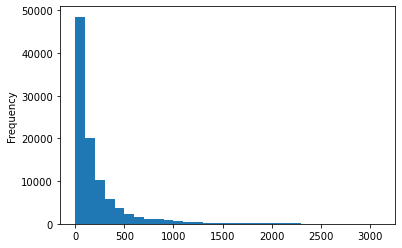

In [17]:
ax = data["content_word_len"].plot.hist(bins=range(0,3200,100))

### On reserre l'analyse sur les premiers 90%

On essaie de voir l'étalement de la distribution

In [18]:
data['content_word_len'].quantile(0.91)

613.0

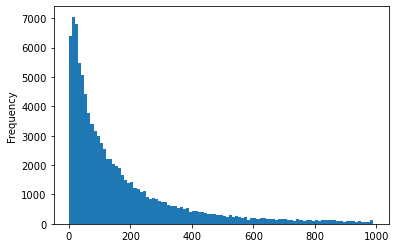

In [19]:
ax = data["content_word_len"].plot.hist(bins=range(0,1000,10))

## Définition des catégories

En utilisant https://www.campaignmonitor.com, on apprend que la longueur idéale d'un mail est entre 50 et 125 mots

#### On choisit donc de créer les catégories suivantes

content_word_len < 50 => "Message court" <br>
50 <= content_word_len < 125 => "Message moyen"

#### En se basant sur la répartition que nous avons observée, on décide de créer les catégories suivantes
125 <= content_word_len < 600 => "Message long" <br>
600 <= content_word_len => "Message très long"


## Création des groupes

In [20]:
content_word_length_q1 = 50
content_word_length_q2 = 125
content_word_length_q3 = 600

In [21]:
data['content_word_length_category'] = data['content_word_len'].apply(lambda x: 1 if x<content_word_length_q1 else (2 if x<content_word_length_q2 else (3 if x<content_word_length_q3 else 4)))

Text(0.5, 0, 'content_word_length_category')

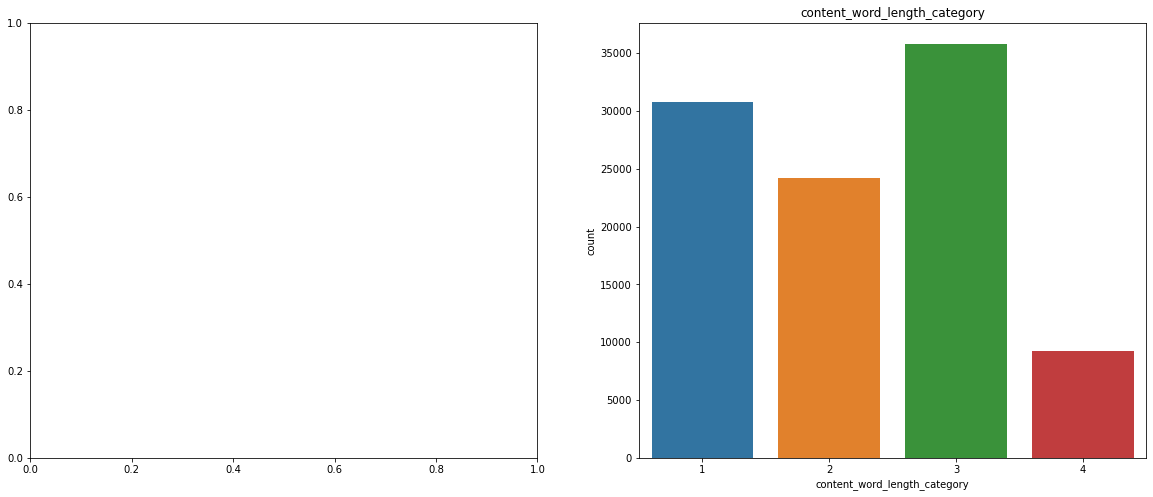

In [22]:
f,ax = plt.subplots(1,2,figsize=(20,8))

sns.countplot(x='content_word_length_category', data=data, ax=ax[1])
ax[1].set_title('content_word_length_category')
ax[1].set_xlabel('content_word_length_category')

# Nettoyage de l'attribut "From"
- Le but est de retirer le texte inutile qui entoure le mail

In [27]:
data["From"][1500]

"frozenset({'david.oxley@enron.com'})"

In [28]:
def clean_from_attribute (field):
    return field[field.find("{")+1:field.find("}")][1:-1]


In [29]:
 clean_from_attribute(data["From"][1500])

'david.oxley@enron.com'

In [30]:
data['From'] = data['From'].apply(lambda x: clean_from_attribute(x))

# Nettoyage de l'attribut "To"
- Ici on souhaite obtenir une liste d'email, plus facile à traiter ensuite
- Certaines lignes possède un attribut vide que nous initialiseront avec une liste vide

In [31]:
data['To']

0              frozenset({'tim.belden@enron.com'})
1           frozenset({'john.lavorato@enron.com'})
2            frozenset({'leah.arsdall@enron.com'})
3             frozenset({'randall.gay@enron.com'})
4              frozenset({'greg.piper@enron.com'})
                           ...                    
99995    frozenset({'carlos.rodriguez@enron.com'})
99996       frozenset({'stella.morris@enron.com'})
99997        frozenset({'aimee.lannou@enron.com'})
99998          frozenset({'pat.clynes@enron.com'})
99999        frozenset({'julie.meyers@enron.com'})
Name: To, Length: 100000, dtype: string

In [32]:
def clean_to_attribute (field):
    if isinstance(field,pd._libs.missing.NAType):
        return []
    else:
        first_clean = field[field.find("{")+1:field.find("}")].split(", ")
        second_clean = [email[1:-1] for email in first_clean]
        return second_clean     

Exemple de "To" vide

In [33]:
print(data["To"][188])

<NA>


Example of multiple To before cleaning

In [34]:
print(data["To"][23424])

frozenset({'michael.moscoso@enron.com', 'victor.guggenheim@enron.com', 'brent.price@enron.com', 'edward.coats@enron.com', 'kim.chick@enron.com', 'ilan.caplan@enron.com', 'sally.beck@enron.com', 'beth.apke@enron.com', 'leon.branom@enron.com', 'mason.hamlin@enron.com', 'leesa.white@enron.com', 'david.yang@enron.com', 'susan.scott@enron.com', 'richard.causey@enron.com', 'obed.cruz@enron.com'})


In [35]:
data["To"] = data["To"].apply(lambda x: clean_to_attribute(x))

Exemple d'attribut "To" vide après le nettoyage

In [36]:
print(data["To"][188])

[]


Exemple de "To" avec plusieurs mail après nettoyage

In [37]:
print(data["To"][23424])

['michael.moscoso@enron.com', 'victor.guggenheim@enron.com', 'brent.price@enron.com', 'edward.coats@enron.com', 'kim.chick@enron.com', 'ilan.caplan@enron.com', 'sally.beck@enron.com', 'beth.apke@enron.com', 'leon.branom@enron.com', 'mason.hamlin@enron.com', 'leesa.white@enron.com', 'david.yang@enron.com', 'susan.scott@enron.com', 'richard.causey@enron.com', 'obed.cruz@enron.com']


# Création d'un attribut nombre de destinataire
- "To_count" : nombre de destinataires par mail

In [38]:
def count_receivers (field):
    return len(field)
            

In [39]:
data["To_count"] = data["To"].apply(lambda x: count_receivers(x))

Exemple de mail avec plusieurs receveurs

In [40]:
data["To"][23424]

['michael.moscoso@enron.com',
 'victor.guggenheim@enron.com',
 'brent.price@enron.com',
 'edward.coats@enron.com',
 'kim.chick@enron.com',
 'ilan.caplan@enron.com',
 'sally.beck@enron.com',
 'beth.apke@enron.com',
 'leon.branom@enron.com',
 'mason.hamlin@enron.com',
 'leesa.white@enron.com',
 'david.yang@enron.com',
 'susan.scott@enron.com',
 'richard.causey@enron.com',
 'obed.cruz@enron.com']

In [41]:
data["To_count"][23424]

15

# II - Création d'un dataframe contenant toutes les adresses mail existantes et des informations concernant ces dernières
- Le nombre de mails envoyés
- Le nombre de mails reçus
- Le nombre de personnes contactées (différent du nombre de mail car un mail peut être envoyé à plusieurs personnes)

In [43]:
user_activities=[]

def count_email_sent(array,df):
    for index, row in df.iterrows():
        array.append((row["From"],1,0,len(row["To"])))

def count_email_received(array,df):
    for i in data["To"]:
        for j in i:
            array.append((j,0,1,0))

In [42]:
count_email_sent(user_activities,data)
count_email_received(user_activities,data)

user_activities_df = pd.DataFrame.from_records(user_activities, columns =['User', 'Sent','Received','People Contacted']) 

In [44]:
user_activities_df

,User,Sent,Received,People Contacted
0,phillip.allen@enron.com,1,0,1
1,phillip.allen@enron.com,1,0,1
2,phillip.allen@enron.com,1,0,1
3,phillip.allen@enron.com,1,0,1
4,phillip.allen@enron.com,1,0,1
...,...,...,...,...
825048,carlos.rodriguez@enron.com,0,1,0
825049,stella.morris@enron.com,0,1,0
825050,aimee.lannou@enron.com,0,1,0
825051,pat.clynes@enron.com,0,1,0


In [45]:
user_activities_df = user_activities_df.groupby("User").agg({"Sent":"sum","Received":"sum","People Contacted":"sum"})
user_activities_df = user_activities_df.sort_values("Sent",ascending=False)

In [46]:
user_activities_df

,Sent,Received,People Contacted
User,,,
jeff.dasovich@enron.com,9441,10098,58290
eric.bass@enron.com,5122,1400,10587
sally.beck@enron.com,4242,5277,13613
john.arnold@enron.com,3492,979,3685
david.delainey@enron.com,2958,651,5707
...,...,...,...
greg.hathaway@enron.com,0,2,0
greg.grissom@enron.com,0,4,0
greg.edwards@foothillspipe.com,0,3,0


Écriture du dataframe en vue d'un traitement sur RStudio

In [241]:
user_activities_df.to_csv (r'./user_activities.csv', index = False, header=True)

# Remplacement des valeurs nulles
- On remplace les valeurs nulles restantes par des "String" descriptifs

In [48]:
def look_values_possible(column):
    return(column.unique())

for i in range(15, 46):
    data.iloc[:, i] = data.iloc[:, i].apply(lambda x: -1 if ((type(x) != type('str'))) else x)


In [49]:
data['X-FileName'] = data['X-FileName'].apply(lambda x: 'No File Name' if ((type(x) != type('str'))) else x )
data['X-bcc'] = data['X-bcc'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['X-cc'] = data['X-cc'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['X-To'] = data['X-To'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['X-From'] = data['X-From'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['Subject'] = data['Subject'].apply(lambda x: 'No subject' if ((type(x) != type('str'))) else x )
data['To'] = data['To'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['X-Folder'] = data['X-Folder'].apply(lambda x: 'No X-Folder' if ((type(x) != type('str'))) else x )
data['X-Origin'] = data['X-Origin'].apply(lambda x: 'No X-Origin' if ((type(x) != type('str'))) else x )

In [50]:
data.isna().sum()


Unnamed: 0                        0
Message-ID                        0
Date                              0
From                              0
To                                0
Subject                           0
X-From                            0
X-To                              0
X-cc                              0
X-bcc                             0
X-Folder                          0
X-Origin                          0
X-FileName                        0
content                         402
user                              0
Cat_1_level_1                     0
Cat_1_level_2                     0
Cat_1_weight                      0
Cat_2_level_1                     0
Cat_2_level_2                     0
Cat_2_weight                      0
Cat_3_level_1                     0
Cat_3_level_2                     0
Cat_3_weight                      0
Cat_4_level_1                     0
Cat_4_level_2                     0
Cat_4_weight                      0
Cat_5_level_1               

# III - Nettoyage des données temporelles
- Ici on crée plusieurs attributs décrivant un aspect de la date d'envoi du mail
- "Years" : l'année d'envoi
- "Month" : le mois de l'année
- "Day" : le jour du mois
- "Hours" : l'heure de la journée
- "DayWeek" : le jour de la semaine

<h4> a - Years.</h4>

In [51]:
data['Years'] = data['Date'].apply(lambda x:  int(x.split('-' )[0]))

In [52]:
print(look_values(data,'Years'))

print(data.Years.describe())

Unique value of Years: 9
count    100000.000000
mean       2000.615800
std           0.827972
min        1980.000000
25%        2000.000000
50%        2001.000000
75%        2001.000000
max        2020.000000
Name: Years, dtype: float64


Text(0.5, 0, '')

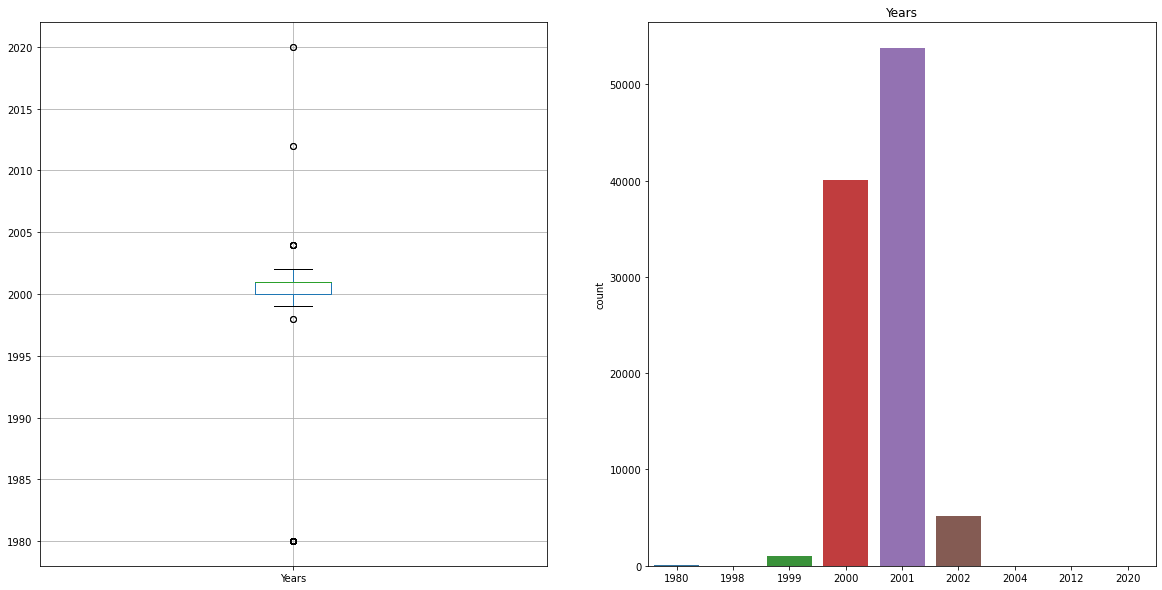

In [53]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data.boxplot(column=['Years'], ax=ax[0])

sns.countplot(x='Years',data=data,ax=ax[1])
ax[1].set_title('Years')
ax[1].set_xlabel('')


<h4>b - Month.</h4>

In [54]:
data['Month'] = data['Date'].apply(lambda x:  int(x.split('-' )[1]))

In [55]:
print(look_values(data,'Month'))
print(data.Month.describe())

Unique value of Month: 12
count    100000.000000
mean          7.231930
std           3.623966
min           1.000000
25%           4.000000
50%           8.000000
75%          10.000000
max          12.000000
Name: Month, dtype: float64


Text(0.5, 0, '')

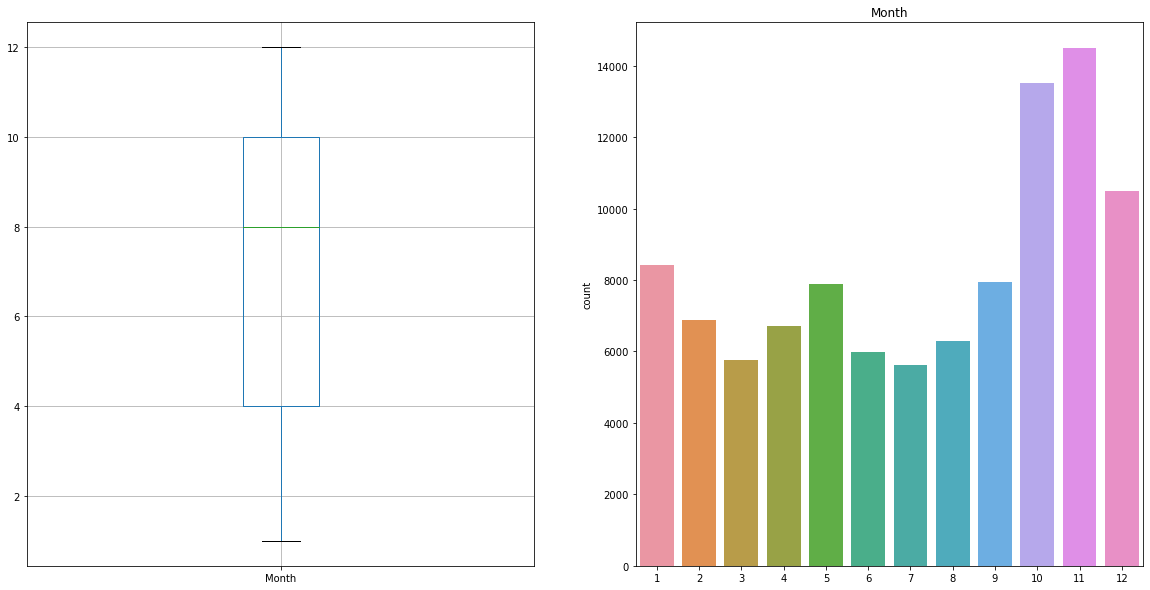

In [56]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data.boxplot(column=['Month'], ax=ax[0])
sns.countplot(x='Month',data=data,ax=ax[1])
ax[1].set_title('Month')
ax[1].set_xlabel('')

<h4> c - Day. </h4>


In [57]:
data['Day'] = data['Date'].apply(lambda x:  int((x.split('-' )[2]).split(' ')[0]))

In [58]:
print(look_values(data,'Day'))
data['Day'].describe()

Unique value of Day: 31


count    100000.000000
mean         16.140620
std           8.705156
min           1.000000
25%           9.000000
50%          16.000000
75%          24.000000
max          31.000000
Name: Day, dtype: float64

Text(0.5, 0, '')

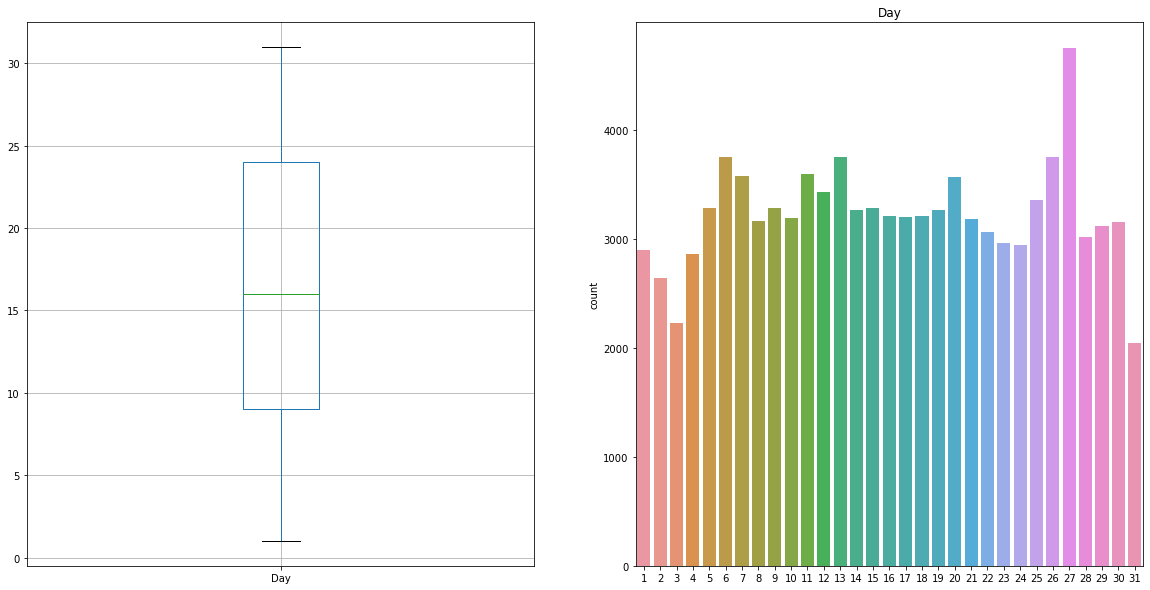

In [59]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data.boxplot(column=['Day'], ax=ax[0])


sns.countplot(x='Day', data=data, ax=ax[1])
ax[1].set_title('Day')
ax[1].set_xlabel('')


<h4> d - Hours. </h4>

In [60]:
data['Hours'] = data['Date'].apply(lambda x:  int(((x.split('-' )[2]).split(' ')[1]).split(':')[0]))

In [61]:
print(look_values(data,'Hours'))
data['Hours'].describe()

Unique value of Hours: 24


count    100000.000000
mean         13.947990
std           5.107395
min           0.000000
25%          11.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: Hours, dtype: float64

Text(0.5, 0, '')

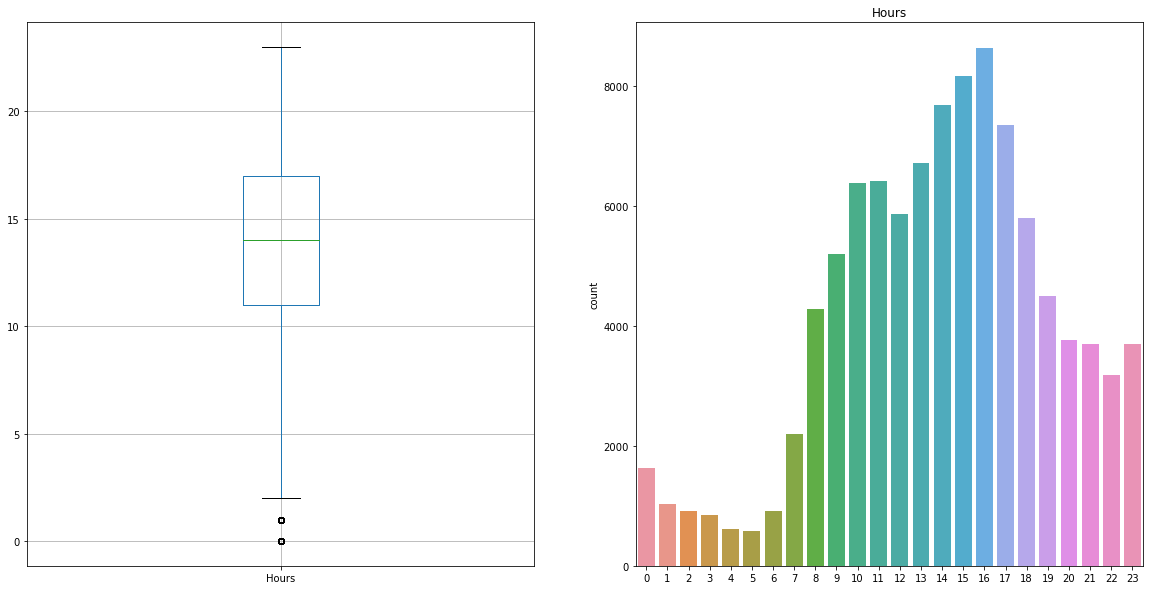

In [62]:
f,ax = plt.subplots(1,2,figsize=(20,10))

data.boxplot(column=['Hours'], ax=ax[0])

sns.countplot(x='Hours', data=data, ax=ax[1])
ax[1].set_title('Hours')
ax[1].set_xlabel('')



<h4>c - Week day.</h4>

On récupère les jours de la semaine 0 -> lundi ... 6 -> dimanche.

In [63]:
dt_series = pd.to_datetime(data['Date'], format="%Y/%m/%d")

dow = []
for dt in range(0, len(data)):
    dow.append(dt_series[dt].weekday())

data.insert(1, 'DayWeek', dow)

In [64]:
print(look_values(data,'DayWeek'))
data['DayWeek'].describe()

Unique value of DayWeek: 7


count    100000.000000
mean          2.096180
std           1.532669
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: DayWeek, dtype: float64

Text(0.5, 0, '')

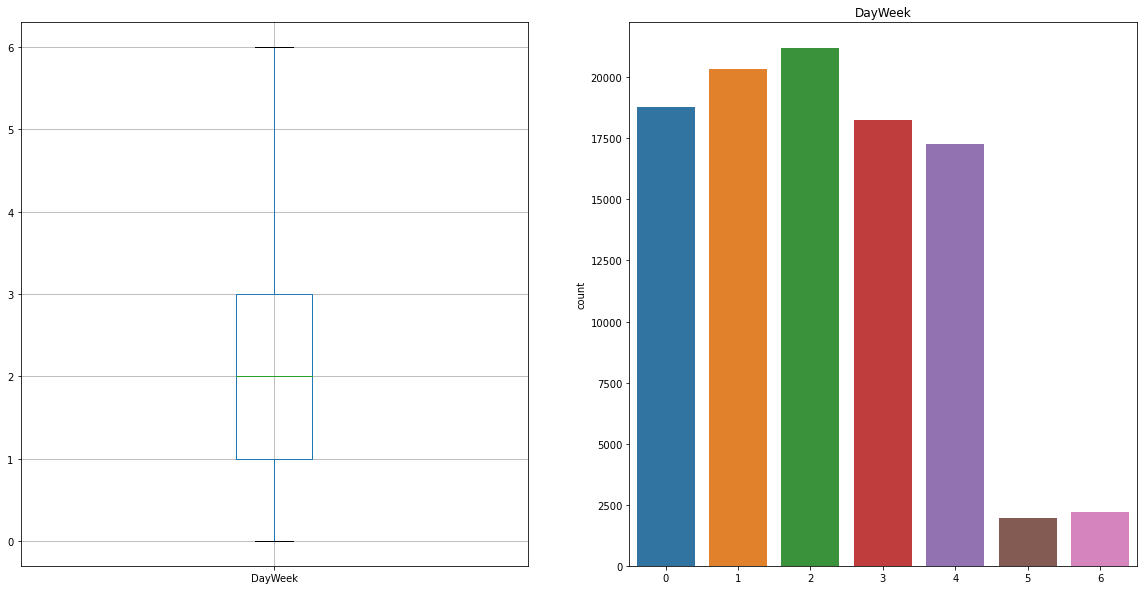

In [65]:
f,ax = plt.subplots(1,2,figsize=(20,10))

data.boxplot(column=['DayWeek'], ax=ax[0])

sns.countplot(x='DayWeek', data=data, ax=ax[1])
ax[1].set_title('DayWeek')
ax[1].set_xlabel('')

